**Lab 4: Ashley Anderson**
<br>**GitHub Link: https://github.com/ashleymaree/Lab4.git**

In [82]:
##load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
##load in data
boston_listings = pd.read_csv("listings.csv")
boston_reviews = pd.read_csv("reviews.csv")

In [17]:
##1a) How many entries are in the file?
boston_listings.shape[0] ## count number of entries in file by the first column

6264

In [23]:
##1b) How many unique identifiers are there for AirBnB listings?
boston_listings.id.nunique() ## count distinct observations removing any NaN values (there are none)

6264

In [24]:
##2a) How many entries are in the file?
boston_reviews.shape[0] ## count number of entries in file by the first column

225880

In [29]:
##2b) How many unique identifiers are there for AirBnB listings?
boston_reviews.listing_id.nunique() ## count distinct observations removing any NaN values

5088

**2c) Do all of the listings have a corresponding review?** With 225,880 reviews and 5,088 listings we can assume that most likely all of the listings have at least 1 review, but can't be for certain until we merge the data.

In [7]:
##3a) Do a merge using the function 'pd.merge' so that all of the entries from listing are in the merged data frame and have an NaN if there is no corresponding entry in reviews.
boston_merge = pd.merge(boston_listings, ## select first data frame as "left" data frame
                        boston_reviews, ## select second data frame as "right" data frame
                        left_on = 'id', ## use column "id" from boston_listings to join data frames since data frames have different column headers
                        right_on = 'listing_id', ## use column "listing_id" from boston_reviews to join data frames since data frames have different column headers
                        how = 'left') ## returns join over the left entries (we want all of the entries from "listing" in the merged data frame)

In [50]:
##3b) How many rows do you now have?
boston_merge.shape[0] ## count number of entries in merged file by the first column

227056

In [52]:
##3c) How many unique AirBnB ids do you have?
boston_merge.id.nunique() ## count distinct observations removing any NaN values

6264

In [54]:
##3d) How many rows were filled in with NaN?
boston_merge.listing_id.isna().sum() ## sum total of NaN values

1176

In [11]:
##4a) This time do a merge so that all of the entries from reviews are in the dataframe (and therefore any entries from listings that do not have a review are dropped)
boston_merge_2 = pd.merge(boston_reviews, ## select first data frame as "left" data frame
                          boston_listings, ## select second data frame as "right" data frame
                          left_on = 'listing_id', ## use column "listing_id" from boston_reviews to join data frames since data frames have different column headers
                          right_on = 'id', ## use column "id" from boston_listings to join data frames since data frames have different column headers
                          how = 'left') ## returns join over the left entries (we want all of the entries from "reviews" in the merged data frame)

In [57]:
##4b) How many rows do you now have?
boston_merge_2.shape[0] ## count number of entries in merged file by the first column

225880

In [58]:
##4c) How many unique AirBnB ids do you have?
boston_merge_2.id.nunique() ## count distinct observations removing any NaN values

5088

In [8]:
##5a) How many unique AirBnBs are hosted by a 'superhost' in Boston?
list(boston_merge.columns) ## Use unique listings merge and find that 'host_is_superhost' is column name of interest
boston_merge[boston_merge.host_is_superhost == 't'].id.nunique() ## count distinct observations where superhost is "true"

1448

In [9]:
##5b) How many superhosts are there in Boston?
list(boston_merge.columns) ## Use unique listings merge and find that 'host_id' is column name of interest
boston_merge[boston_merge.host_is_superhost == 't'].host_id.nunique() ## count distinct host id observations where superhost is "true"

757

In [85]:
##5c) How many superhosts do not have any reviews in the 'reviews' dataset?
boston_merge_2[boston_merge_2.host_is_superhost == 't'].groupby('host_id').sort_values(by = ['date'])

AttributeError: 'DataFrameGroupBy' object has no attribute 'sort_values'

In [53]:
##5d) What is the median number of reviews that a superhost has in the 'reviews' dataset?
five_d = boston_merge_2[boston_merge_2.host_is_superhost == 't'].groupby('host_id').count() ## Use unique reviews merge and filter for superhosts. Group by "host_id" and count number of entries per host id
five_d.listing_id.median() ## find median of counts of reviews

73.0

Text(0, 0.5, 'Number of Reviews')

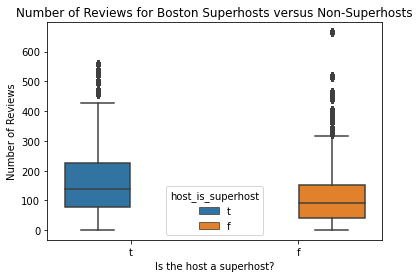

In [83]:
##6) Make boxplots to compare the number of reviews of superhosts to non-superhosts.
sns.boxplot(x = "host_is_superhost", y = "number_of_reviews", hue = "host_is_superhost", data = boston_merge_2) ## initate boxplot with superhost status on x-axis and total number of reviews on y-axis
plt.title('Number of Reviews for Boston Superhosts versus Non-Superhosts') ## add plot title
plt.xlabel('Is the host a superhost?') ## add x-axis label
plt.ylabel('Number of Reviews') ## add y-axis label